## Do EDA and some graphs and plots to understand the dataset


In [150]:
import pandas as pd

df_original = pd.read_csv("../src/taxipred/data/taxi_trip_pricing.csv")
df_original.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


In [151]:
df_original.isna().sum()
df_original.describe().T

,count,mean,std,min,25%,50%,75%,max
Trip_Distance_km,950.0,27.070547,19.905300,1.2300,12.63250,25.8300,38.40500,146.067047
Passenger_Count,950.0,2.476842,1.102249,1.0000,1.25000,2.0000,3.00000,4.000000
Base_Fare,950.0,3.502989,0.870162,2.0100,2.73000,3.5200,4.26000,5.000000
Per_Km_Rate,950.0,1.233316,0.429816,0.5000,0.86000,1.2200,1.61000,2.000000
Per_Minute_Rate,950.0,0.292916,0.115592,0.1000,0.19000,0.2900,0.39000,0.500000
Trip_Duration_Minutes,950.0,62.118116,32.154406,5.0100,35.88250,61.8600,89.05500,119.840000
Trip_Price,951.0,56.874773,40.469791,6.1269,33.74265,50.0745,69.09935,332.043689


#### Du har en del nullvärden i datasetet, fundera på lämpliga sätt att städa datan.
- Vissa värden kanske kan ersättas med 0? Andra värden kanske kan ersättas med något annat? En del rader kan man kasta helt.
- Vill du ta enkla vägen så kan du kan kasta de flesta raderna med nulls. Se dock till att spara de raderna där label saknas - dessa kan med fördel användas som user inputs för att få en prediction av resepriset.

- Se också till att ta bort eventuella outliers, exempelvis i priset då outliers enkelt kan påverka modellers noggrannhet. Ni kan exportera datan efter ni processat den så kan ni använda den rensade datan i applikationen istället för rådatan.

1. Replace some values with 0 or something else, some rows can be discarded.
2. Remove outliers, for eg. in price, because they will negativly affect the models accuracy. 
3. Export the clean data and use this in the application

- Välja mean eller median för att fillna: kolla boxplot:  om du ser tydliga outliers så är det bättre att använda median, men utan outliers välj mean. 

In [152]:
len(df_original.dropna()) #enbart 562 om du droppar allt
len(df_original) # Hela dataset är 1000 rader
df_original.head(2)

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN


In [153]:
nulls = df_original["Trip_Price"].isna() #&	df_original["Per_Minute_Rate"].isna() &	df["Trip_Duration_Minutes"].isna() &	df["Trip_Price"].isna()
nulls.sum()
# df_original.columns 

np.int64(49)

## Mean och Median values in dataset

In [154]:
int_columns = ['Trip_Distance_km', 'Passenger_Count', 'Base_Fare', 'Per_Km_Rate','Per_Minute_Rate', 'Trip_Duration_Minutes']
medians_means = []
for col in int_columns:
    print(f"{col}: {df_original[col].median():.2f} - Median")
    print(f"{col}: {df_original[col].mean():.2f} - Mean\n")
    medians_means.append(df_original[col].median())
    medians_means.append(df_original[col].mean())

# Vid outliers, välj median!! 
#Trip_distance_km = Median
# 'Trip_Distance_km', = Mean
# 'Passenger_Count', = Mean
# 'Base_Fare', = Mean
# 'Per_Km_Rate',= Mean
# 'Per_Minute_Rate', = Mean
# 'Trip_Duration_Minutes', = Mean
# 'Trip_Price' = Median

Trip_Distance_km: 25.83 - Median
Trip_Distance_km: 27.07 - Mean

Passenger_Count: 2.00 - Median
Passenger_Count: 2.48 - Mean

Base_Fare: 3.52 - Median
Base_Fare: 3.50 - Mean

Per_Km_Rate: 1.22 - Median
Per_Km_Rate: 1.23 - Mean

Per_Minute_Rate: 0.29 - Median
Per_Minute_Rate: 0.29 - Mean

Trip_Duration_Minutes: 61.86 - Median
Trip_Duration_Minutes: 62.12 - Mean



Text(0.5, 1.0, 'Boxplot original dataset')

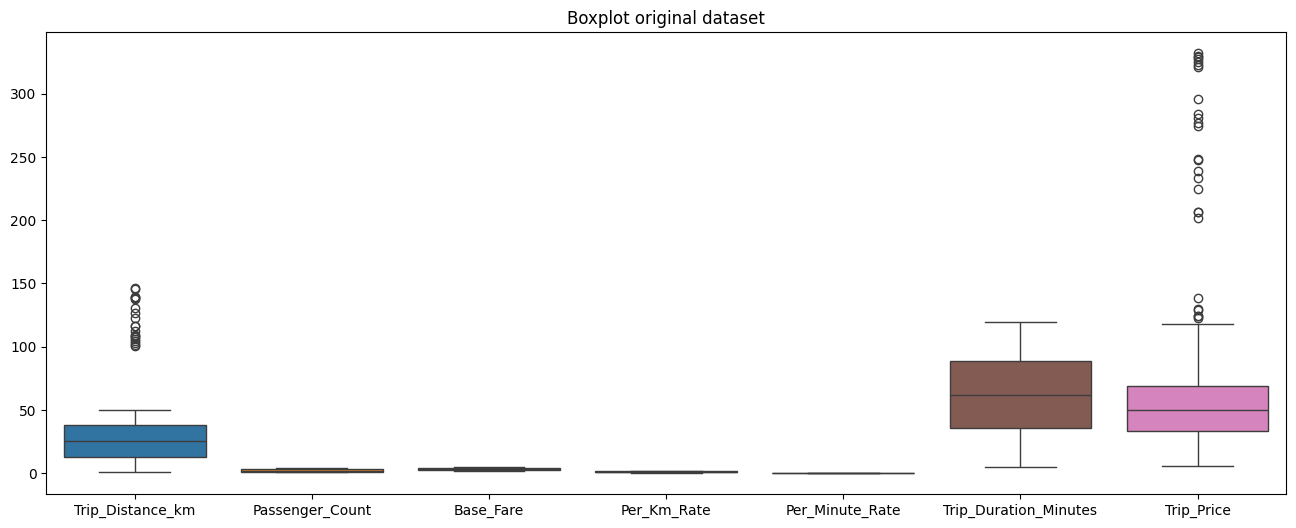

In [155]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16,6))
sns.boxplot(data=df_original, ax=ax)
ax.set_title("Boxplot original dataset")


## Handle nulls

In [156]:
# df_original.head()
df_original.describe().T

,count,mean,std,min,25%,50%,75%,max
Trip_Distance_km,950.0,27.070547,19.905300,1.2300,12.63250,25.8300,38.40500,146.067047
Passenger_Count,950.0,2.476842,1.102249,1.0000,1.25000,2.0000,3.00000,4.000000
Base_Fare,950.0,3.502989,0.870162,2.0100,2.73000,3.5200,4.26000,5.000000
Per_Km_Rate,950.0,1.233316,0.429816,0.5000,0.86000,1.2200,1.61000,2.000000
Per_Minute_Rate,950.0,0.292916,0.115592,0.1000,0.19000,0.2900,0.39000,0.500000
Trip_Duration_Minutes,950.0,62.118116,32.154406,5.0100,35.88250,61.8600,89.05500,119.840000
Trip_Price,951.0,56.874773,40.469791,6.1269,33.74265,50.0745,69.09935,332.043689


In [157]:
df_original.describe().T

,count,mean,std,min,25%,50%,75%,max
Trip_Distance_km,950.0,27.070547,19.905300,1.2300,12.63250,25.8300,38.40500,146.067047
Passenger_Count,950.0,2.476842,1.102249,1.0000,1.25000,2.0000,3.00000,4.000000
Base_Fare,950.0,3.502989,0.870162,2.0100,2.73000,3.5200,4.26000,5.000000
Per_Km_Rate,950.0,1.233316,0.429816,0.5000,0.86000,1.2200,1.61000,2.000000
Per_Minute_Rate,950.0,0.292916,0.115592,0.1000,0.19000,0.2900,0.39000,0.500000
Trip_Duration_Minutes,950.0,62.118116,32.154406,5.0100,35.88250,61.8600,89.05500,119.840000
Trip_Price,951.0,56.874773,40.469791,6.1269,33.74265,50.0745,69.09935,332.043689


In [158]:
# loopa igenom och tilldela alla mean, förutom trip_distance_km och trip_price. Passenger count ev. median. 
df = df_original.copy()
for col in int_columns:
    df[col] = df[col].fillna(df[col].median())

df.describe().T - df_original.describe().T # df fillna meadian


,count,mean,std,min,25%,50%,75%,max
Trip_Distance_km,50.0,-0.062027,-0.502639,0.0,0.4750,0.0,-0.6225,0.0
Passenger_Count,50.0,-0.023842,-0.022918,0.0,0.7500,0.0,0.0000,0.0
Base_Fare,50.0,0.000851,-0.022047,0.0,0.0400,0.0,-0.0575,0.0
Per_Km_Rate,50.0,-0.000666,-0.010884,0.0,0.0100,0.0,-0.0300,0.0
Per_Minute_Rate,50.0,-0.000146,-0.002928,0.0,0.0075,0.0,-0.0075,0.0
Trip_Duration_Minutes,50.0,-0.012906,-0.814943,0.0,1.2250,0.0,-1.2800,0.0
Trip_Price,0.0,0.000000,0.000000,0.0,0.0000,0.0,0.0000,0.0


In [159]:
df = df_original.copy()
for col in int_columns:
    df[col] = df[col].fillna(df[col].mean())
df.describe().T - df_original.describe().T # df = fillna mean

,count,mean,std,min,25%,50%,75%,max
Trip_Distance_km,50.0,-3.552714e-15,-0.504525,0.0,0.4750,1.165000,-0.6225,0.0
Passenger_Count,50.0,0.000000e+00,-0.027938,0.0,0.7500,0.476842,0.0000,0.0
Base_Fare,50.0,0.000000e+00,-0.022055,0.0,0.0400,-0.017011,-0.0575,0.0
Per_Km_Rate,50.0,-2.220446e-16,-0.010894,0.0,0.0100,0.013316,-0.0300,0.0
Per_Minute_Rate,50.0,0.000000e+00,-0.002930,0.0,0.0075,0.002916,-0.0075,0.0
Trip_Duration_Minutes,50.0,-7.105427e-15,-0.814993,0.0,1.2250,0.258116,-1.2800,0.0
Trip_Price,0.0,0.000000e+00,0.000000,0.0,0.0000,0.000000,0.0000,0.0


### Fill trip_duration_minutes, per_km_rate och trip_distance_km, Passenger_Count with median and the rest with mean

In [160]:
    # if col == "Per_Km_Rate" or col == "Trip_Duration_Minutes":
    #     df[col] = df[col].fillna(df[col].mean())
    # else: 
    #     df[col] = df[col].fillna(df[col].median())
df = df_original.copy()

for col in int_columns:
    if col == "Trip_Duration_Minutes" or col == "Per_Km_Rate" or col == "Trip_Distance_km" or col == "Passenger_Count": 
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna(df[col].mean())
df["Time_of_Day"] = df["Time_of_Day"].fillna("Afternoon")
df["Day_of_Week"] = df["Day_of_Week"].fillna("Weekday")
df["Traffic_Conditions"] = df["Traffic_Conditions"].fillna("Low") #stor öking, 363 mot 412!  
df["Weather"] = df["Weather"].fillna("Clear")
df.describe().T - df_original.describe().T

,count,mean,std,min,25%,50%,75%,max
Trip_Distance_km,50.0,-0.062027,-0.502639,0.0,0.4750,0.000000,-0.6225,0.0
Passenger_Count,50.0,-0.023842,-0.022918,0.0,0.7500,0.000000,0.0000,0.0
Base_Fare,50.0,0.000000,-0.022055,0.0,0.0400,-0.017011,-0.0575,0.0
Per_Km_Rate,50.0,-0.000666,-0.010884,0.0,0.0100,0.000000,-0.0300,0.0
Per_Minute_Rate,50.0,0.000000,-0.002930,0.0,0.0075,0.002916,-0.0075,0.0
Trip_Duration_Minutes,50.0,-0.012906,-0.814943,0.0,1.2250,0.000000,-1.2800,0.0
Trip_Price,0.0,0.000000,0.000000,0.0,0.0000,0.000000,0.0000,0.0


Text(0.5, 1.0, 'Boxplot cleaned dataset')

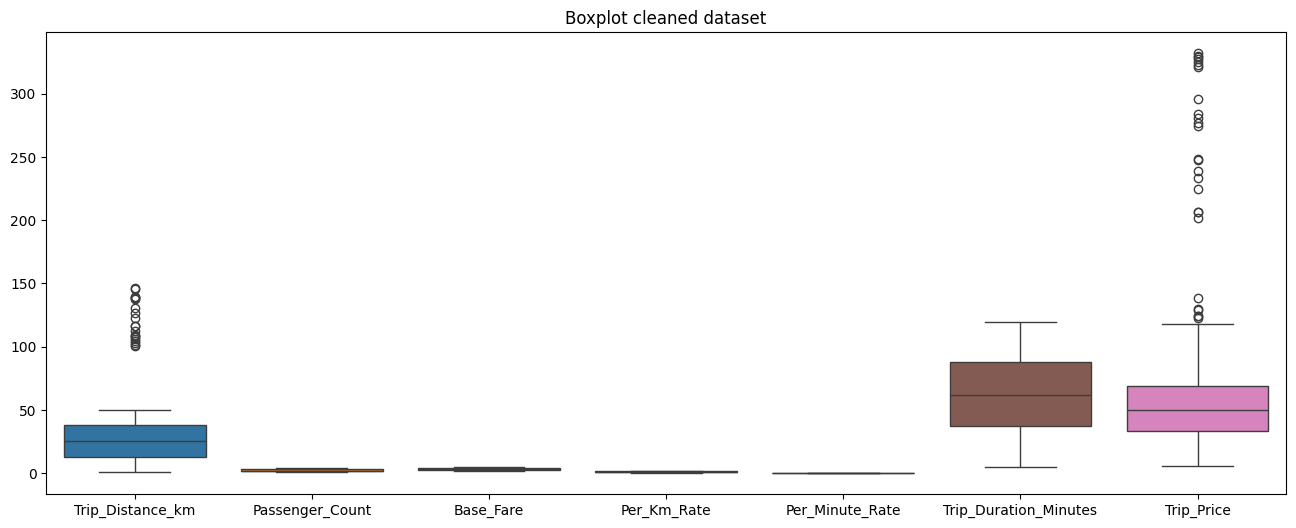

In [161]:
fig, ax = plt.subplots(figsize=(16,6))
sns.boxplot(data=df, ax=ax)
ax.set_title("Boxplot cleaned dataset")

### Save the rows missing price, for prediction later

In [162]:
len(df)

1000

In [163]:
df_target = df[df["Trip_Price"].isna()]
df = df[df["Trip_Price"].notna()]
len(df), len(df_target)


(951, 49)

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 951 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       951 non-null    float64
 1   Time_of_Day            951 non-null    object 
 2   Day_of_Week            951 non-null    object 
 3   Passenger_Count        951 non-null    float64
 4   Traffic_Conditions     951 non-null    object 
 5   Weather                951 non-null    object 
 6   Base_Fare              951 non-null    float64
 7   Per_Km_Rate            951 non-null    float64
 8   Per_Minute_Rate        951 non-null    float64
 9   Trip_Duration_Minutes  951 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 89.2+ KB


## Removing outliers 
- Q1 = 25% precentile
- Q3 = 75% precentile
- IQR = Q3 - Q1
- Lower bound = Q1 - 1.5 * IQR
- Upper bound = Q3 +1.5 * IQR


In [165]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Trip_Distance_km,951.0,27.119442,19.619921,1.2300,13.13000,25.830000,37.83000,146.067047
Passenger_Count,951.0,2.455310,1.077937,1.0000,2.00000,2.000000,3.00000,4.000000
Base_Fare,951.0,3.497373,0.846420,2.0100,2.76500,3.502989,4.17000,5.000000
Per_Km_Rate,951.0,1.229474,0.419888,0.5000,0.87000,1.220000,1.58000,2.000000
Per_Minute_Rate,951.0,0.293852,0.112389,0.1000,0.20000,0.292916,0.39000,0.500000
Trip_Duration_Minutes,951.0,62.035237,31.529372,5.0100,36.65000,61.860000,87.87500,119.840000
Trip_Price,951.0,56.874773,40.469791,6.1269,33.74265,50.074500,69.09935,332.043689


### trip_distance_km

In [166]:
# Q1 = 13.1
# Q3 = 37.78
Q1, Q3 = df["Trip_Distance_km"].quantile(0.25), df["Trip_Distance_km"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

print(lower_bound, upper_bound)

df = df[(df["Trip_Distance_km"] >= lower_bound) & (df["Trip_Distance_km"] <= upper_bound)]

df.describe().T

-23.919999999999998 74.88


,count,mean,std,min,25%,50%,75%,max
Trip_Distance_km,931.0,25.110064,13.991988,1.2300,12.8800,25.830000,37.1150,49.9900
Passenger_Count,931.0,2.464017,1.077405,1.0000,2.0000,2.000000,3.0000,4.0000
Base_Fare,931.0,3.497692,0.845168,2.0100,2.7650,3.502989,4.1700,5.0000
Per_Km_Rate,931.0,1.227981,0.419570,0.5000,0.8700,1.220000,1.5700,2.0000
Per_Minute_Rate,931.0,0.294272,0.112698,0.1000,0.2000,0.292916,0.3900,0.5000
Trip_Duration_Minutes,931.0,61.984876,31.638246,5.0100,36.5950,61.860000,87.8500,119.8400
Trip_Price,931.0,52.181554,24.091073,6.1269,33.3907,48.835000,67.0695,138.6425


### Trip price

In [167]:
Q1, Q3 = df["Trip_Price"].quantile(0.25), df["Trip_Price"].quantile(0.75)
# Q1, Q3 = 33.39, 67.06
IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)
print(Q1, Q3)

df = df[(df["Trip_Price"] >= lower_bound) & (df["Trip_Price"] <= upper_bound)]
df.info()

33.3907 67.0695
<class 'pandas.core.frame.DataFrame'>
Index: 923 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       923 non-null    float64
 1   Time_of_Day            923 non-null    object 
 2   Day_of_Week            923 non-null    object 
 3   Passenger_Count        923 non-null    float64
 4   Traffic_Conditions     923 non-null    object 
 5   Weather                923 non-null    object 
 6   Base_Fare              923 non-null    float64
 7   Per_Km_Rate            923 non-null    float64
 8   Per_Minute_Rate        923 non-null    float64
 9   Trip_Duration_Minutes  923 non-null    float64
 10  Trip_Price             923 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.5+ KB


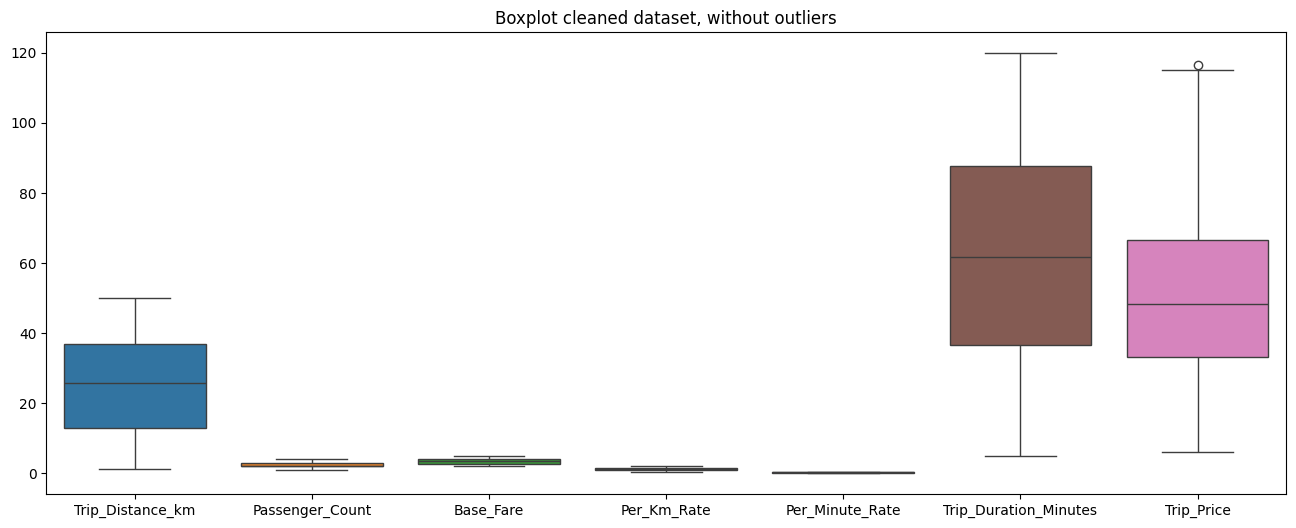

In [168]:
fig, ax = plt.subplots(figsize=(16,6))
sns.boxplot(data=df, ax=ax)
ax.set_title("Boxplot cleaned dataset, without outliers");

In [169]:
len(df), len(df_target)

(923, 49)

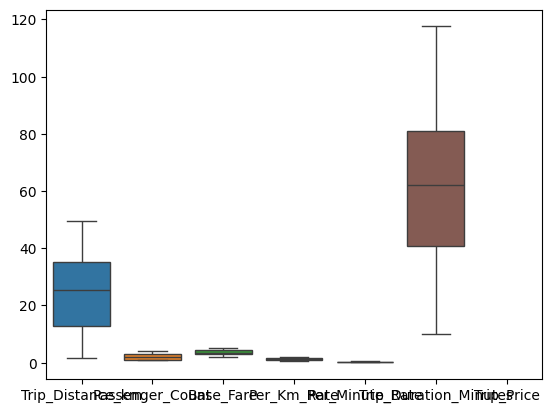

In [170]:
sns.boxplot(df_target);

### Export df and df target to csv

In [171]:
df_target.to_csv("../src/taxipred/data/target_data.csv")
df.to_csv("../src/taxipred/data/cleaned_data.csv")
